In [1]:
import numpy as np
import pandas as pd

In [2]:
values = [
    np.random.normal(100, 10, 1000),
    np.random.normal(100, 10, 1000),
    np.random.normal(100, 10, 1000),
    np.random.normal(100, 10, 1000),
]

factor_df = pd.DataFrame(values).T
factor_df.columns = [f"factor_{idx+1}" for idx in range(len(values))]

value_df = pd.DataFrame(np.random.normal(100, 10, 1000), columns=["value"])

In [3]:
factor_df.head()

,factor_1,factor_2,factor_3,factor_4
0,99.369061,93.979146,97.430634,119.425570
1,116.910960,102.443958,100.092321,113.749805
2,126.307939,103.514580,96.546747,94.577561
3,80.924707,95.433310,102.109446,108.871018
4,114.423144,96.525456,90.493983,99.471468


In [4]:
value_df.head()

,value
0,97.356686
1,116.213703
2,79.540950
3,111.295029
4,108.739583


In [5]:
df = pd.concat([factor_df, value_df], axis=1)

factor_columns = factor_df.columns
value_columns = value_df.columns

In [6]:
df

,factor_1,factor_2,factor_3,factor_4,value
0,99.369061,93.979146,97.430634,119.425570,97.356686
1,116.910960,102.443958,100.092321,113.749805,116.213703
2,126.307939,103.514580,96.546747,94.577561,79.540950
3,80.924707,95.433310,102.109446,108.871018,111.295029
4,114.423144,96.525456,90.493983,99.471468,108.739583
...,...,...,...,...,...
995,95.491843,86.541984,105.846442,100.148037,96.200732
996,119.127840,96.998083,108.614541,110.988337,113.854275
997,84.866131,94.741056,94.534801,92.205434,98.385899
998,113.172966,101.217418,99.180673,96.958433,79.868132


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

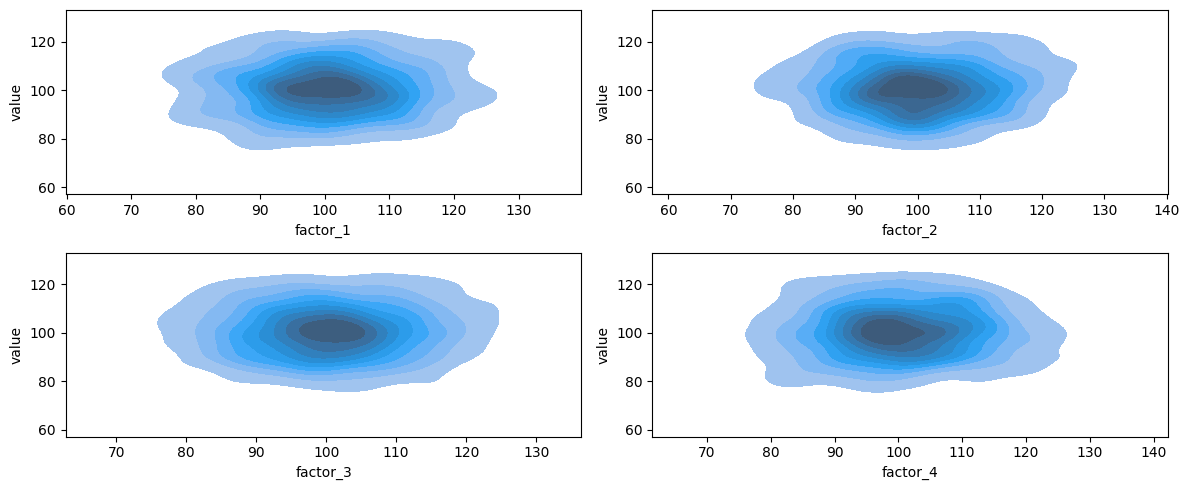

In [8]:
# 1d analysis plot
fig = plt.figure(figsize=(12, 5))
plt.subplot(2, 2, 1)
sns.kdeplot(data=df, x="factor_1", y="value", fill=True)

plt.subplot(2, 2, 2)
sns.kdeplot(data=df, x="factor_2", y="value", fill=True)

plt.subplot(2, 2, 3)
sns.kdeplot(data=df, x="factor_3", y="value", fill=True)

plt.subplot(2, 2, 4)
sns.kdeplot(data=df, x="factor_4", y="value", fill=True)
plt.tight_layout()
plt.show()

In [9]:
# 1d analysis calculate
def factor_quantile_analysis(df, factor, value, n):
    factor_analysis_series = (
        pd.concat([pd.qcut(df[factor], n, labels=False), df[value]], axis=1)
        .groupby(factor)[value]
        .apply(lambda x: (x.mean(), x.var(), x.count()))
    )
    factor_analysis_df = factor_analysis_series.apply(pd.Series)
    factor_analysis_df.columns = ["mean", "var", "count"]
    return factor_analysis_df


factor_quantile_analysis(df, "factor_1", "value", 10)

,mean,var,count
factor_1,,,
0,100.297987,103.944881,100.0
1,98.922381,124.537340,100.0
2,100.665496,92.973481,100.0
3,101.115890,83.023447,100.0
4,100.037947,94.194958,100.0
5,100.873937,86.197867,100.0
6,100.400452,80.738629,100.0
7,100.830093,99.589068,100.0
8,99.758892,88.230183,100.0


In [10]:
factor_quantile_analysis(df, "factor_1", "value", 10)

,mean,var,count
factor_1,,,
0,100.297987,103.944881,100.0
1,98.922381,124.537340,100.0
2,100.665496,92.973481,100.0
3,101.115890,83.023447,100.0
4,100.037947,94.194958,100.0
5,100.873937,86.197867,100.0
6,100.400452,80.738629,100.0
7,100.830093,99.589068,100.0
8,99.758892,88.230183,100.0
